In [70]:
!pip install opencv-python

In [71]:
import matplotlib.pyplot as plt


In [72]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [73]:
import cv2


In [74]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [75]:
ClassLabels = []
file_name="labels.txt"
with open(file_name,'rt') as fpt:
  ClassLabels=fpt.read().rstrip('\n').split('\n')

In [76]:
print(len(ClassLabels))

80


In [77]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2= 127.5
model.setInputMean((127.5,127.5,127.5)) # mobilenet takes input as [-1,1]
model.setInputSwapRB(True) #automatically converts BGR to RGB

< cv2.dnn.Model 000002533EB094D0>

#Read the Images


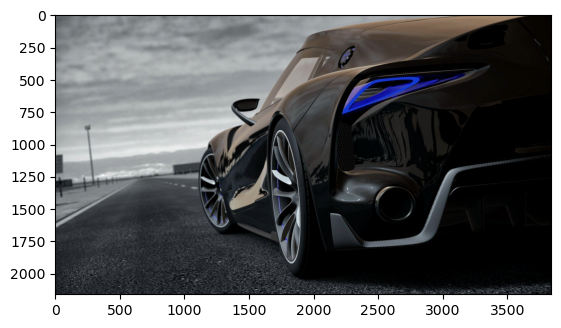

In [79]:
img=cv2.imread("47504.jpg")
plt.imshow(img)

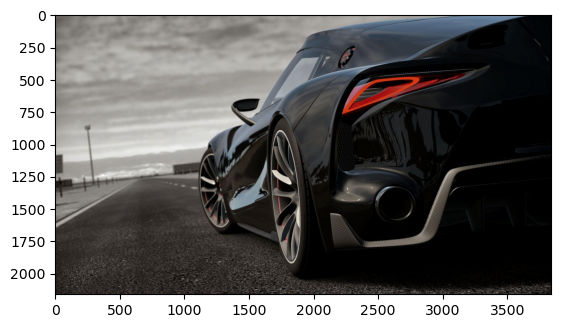

In [80]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [81]:
ClassIndex,Confidence,bbox = model.detect(img,confThreshold=0.5)

In [82]:
print(ClassIndex)

[3]


In [83]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),Confidence.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,ClassLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

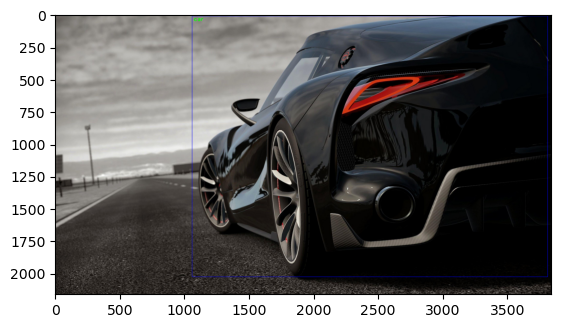

In [84]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

#Video Demo

In [133]:
import cv2
from IPython.display import display, Image, clear_output
import time

# Load your object detection model (refer to your notebook code)
# ... (Your model loading and initialization code here) ...

# Class labels (from your notebook)
ClassLabels = []
file_name = "labels.txt"
with open(file_name, 'rt') as fpt:
    ClassLabels = fpt.read().rstrip('\n').split('\n')

# Video capture
cap = cv2.VideoCapture("video.mp4")  # Or 0 for webcam

try:
    while True:
        ret, frame = cap.read()

        if not ret:
            break

        # Object detection (refer to your notebook code)
        ClassIndex, Confidence, bbox = model.detect(frame, confThreshold=0.55)

        # Draw bounding boxes and labels
        font_scale = 3
        font = cv2.FONT_HERSHEY_PLAIN
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), Confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, ClassLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

        # Convert frame to JPEG for display
        _, jpeg_frame = cv2.imencode('.jpg', frame)
        display(Image(data=jpeg_frame.tobytes()))

        clear_output(wait=True)
        time.sleep(0.05)

except KeyboardInterrupt:
    pass

finally:
    cap.release()

AttributeError: 'tuple' object has no attribute 'flatten'